In [1]:
import numpy as np
import pandas as pd

# review
import itertools
import json
import matplotlib.backends.backend_pdf
import pathlib
import seaborn as sns

from matplotlib import pyplot as plt
from matplotlib.gridspec import SubplotSpec
from matplotlib.pylab import rcParams
from mpl_toolkits.axes_grid1 import make_axes_locatable

from catalyst_fund_eda import CatalystFundEDA
# from catalyst_report import CatalystReport

palette_status = {"FUNDED": '#0570b0', # blue
                 "NOT FUNDED": '#cb181d', # red
                 "NOT APPROVED": '#ec7014'} # orange

# CATALYST FUND EDA

In [2]:
# load CatalystFundEAD objects
catalyst_f_eda = {}
for f in ['f3','f4','f5','f6','f7','f8']:
    catalyst_f_eda[f] = CatalystFundEDA(f)
    
    print('\n-----------------')
    print(' FUND: ', catalyst_f_eda[f].fund)
    print('\nChallenges:')
    display(catalyst_f_eda[f].challenges)


-----------------
 FUND:  f3

Challenges:


0          DApp creation
1    Developer ecosystem
2       Community choice
Name: challenge, dtype: object


-----------------
 FUND:  f4

Challenges:


0              DApp&Integrations
1            Developer ecosystem
2    Distributed decision making
3              Proposer Outreach
4      Catalyst Value Onboarding
5        Local Community Centers
6        Fund6 Challenge Setting
7         Sponsored by leftovers
Name: challenge, dtype: object


-----------------
 FUND:  f5

Challenges:


0                Developer ecosystem
1                  DApp&Integrations
2        Distributed decision making
3                  Proposer Outreach
4          Catalyst Value Onboarding
5                 Metadata challenge
6       Grow Africa, Grow Cardano wv
7    Scale-UP Cardanos DeFi Ecosyste
8         Fund7 Challenge Setting wv
9             Sponsored by leftovers
Name: challenge, dtype: object


-----------------
 FUND:  f6

Challenges:


0                 Developer ecosystem
1                DApps & Integrations
2         Distributed decision making
3                   Proposer outreach
4           Catalyst value onboarding
5                            Metadata
6           Grow Africa, Grow Cardano
7     Scale-UP Cardano’s DeFi Ecosyst
8       Cardano Emerging Threat Alarm
9              Multilingual resources
10    DeFi and Microlending for Afric
11       DLT Entrepreneurship Toolbox
12    Partnerships for Global Adoptio
13                NFT Business models
14    Atala PRISM DID Mass-Scale Adop
15      Disaster When all is at stake
16    Scale-UP Cardano’s Community Hu
17      Improve and Grow Auditability
18            Fund7 challenge setting
19             Sponsored by leftovers
Name: challenge, dtype: object


-----------------
 FUND:  f7

Challenges:


0     A.I. & SingularityNet a $5T mar
1     Accelerate Decentralized Identi
2              Boosting Cardanos DeFi
3     Catalyst - Rapid Funding Mechan
4      Catalyst Accelerator & Mentors
5     Catalyst Natives COTI Pay with 
6                    Community Events
7        Connecting Japan日本 Community
8                      DAOs ❤ Cardano
9                DApps & Integrations
10    Disarm cyber disinformation att
11                  Gamers On-Chained
12     Global Sustainable Indep. SPOs
13    Grow Latin America, Grow Cardan
14      Improve and Grow Auditability
15    Lobbying for favorable legislat
16    MiniLow-Budget Dapps & Integrat
17            Miscellaneous Challenge
18             Multilingual resources
19              Nation Building Dapps
20     New SPO Business Opportunities
21    Open Source Developer Ecosystem
22    Scale-UP Cardanos Community Hub
23    Seeding Cardanos Grassroots DeF
24            Fund8 challenge setting
25             Sponsored by leftovers
Name: challe


-----------------
 FUND:  f8

Challenges:


0     Accelerate Decentralized Identi
1      Business Solutions (B2B & B2C)
2           Cardano scaling solutions
3      Community Advisor Improvements
4           Cross-Chain Collaboration
5              DApps and Integrations
6                 Developer Ecosystem
7     Film + Media (FAM) creatives un
8                 Gamers On - Chained
9           Grow Africa, Grow Cardano
10       Grow East Asia, Grow Cardano
11           Grow India, Grow Cardano
12      Improve and Grow Auditability
13    Lobbying for favorable legislat
14            Miscellaneous Challenge
15              Nation Building Dapps
16              New Member Onboarding
17    Open Source Development Ecosyst
18    Open Standards & Interoperabili
19    Scale-UP Cardanos Community Hub
20            Self-Sovereign Identity
21    The Great Migration (from Ether
22            Fund9 challenge setting
23                Funded by leftovers
Name: challenge, dtype: object

eg = 'f5'
fund_obj = catalyst_f_eda[eg]
print('>> e.g. FUND DEFAULT RESULTS')
display(fund_obj.results.head(2))
print('\n>> e.g. CHALLANGE-SPECIFIC RESULTS')
display(fund_obj.get_challenge_results(fund_obj.challenges[0]).head(2))

## Fund Statistics

'''
Statistics of Funded, Not Funded and Not Approved proposals: 
    average score, 
    a minimum score of a Funded proposal in each challenge, 
    maximum score of a Not Funded proposal in each challenge, 
    absolute numbers and percentages of Funded, 
    Not Funded and Not Approved proposals
'''

### Distribution and Table

f='f5'
fund_obj = catalyst_f_eda[f]
fund_obj.plot_distribution()
fund_obj.get_statistics(feats=['SCORE', 'REQUESTED %'], metrics=['count', 'count%', 'mean', 'min', 'max'])

f='f6'
fund_obj = catalyst_f_eda[f]
fund_obj.plot_distribution()
fund_obj.get_statistics(feats=['SCORE', 'REQUESTED %'], metrics=['count', 'count%', 'mean', 'min', 'max'])

f='f8'
fund_obj = catalyst_f_eda[f]
fund_obj.plot_distribution('REQUESTED %')
fund_obj.get_statistics(feats=['SCORE', 'REQUESTED %'], metrics=['count', 'count%', 'mean', 'min', 'max'])

### SWARM PLOT

f='f5'
fund_obj = catalyst_f_eda[f]
fund_obj.plot_swarm()

f='f7'
fund_obj = catalyst_f_eda[f]
fund_obj.plot_swarm()

f='f4'
fund_obj = catalyst_f_eda[f]
fund_obj.plot_swarm('REQUESTED $')

### LM PLOTS

f='f5'
fund_obj = catalyst_f_eda[f]
x_feat = 'SCORE'
y_feat = 'REQUESTED %'
fit_reg = False
fund_obj.plot_lm(x_feat, y_feat)

f='f5'
fund_obj = catalyst_f_eda[f]
x_feat = 'REQUESTED %'
y_feat = 'Unique No'
fit_reg = True
fund_obj.plot_lm(x_feat, y_feat, fit_reg)

f='f5'
fund_obj = catalyst_f_eda[f]
x_feat = 'SCORE'
y_feat = 'Unique Yes'
fit_reg = True
fund_obj.plot_lm(x_feat, y_feat, fit_reg)

### 

### AREA RANKING PLOTS

In [3]:
f='f5'
fund_obj = catalyst_f_eda[f]

fund_obj.plot_budget_availability()

### BUDGET PIE PLOTS

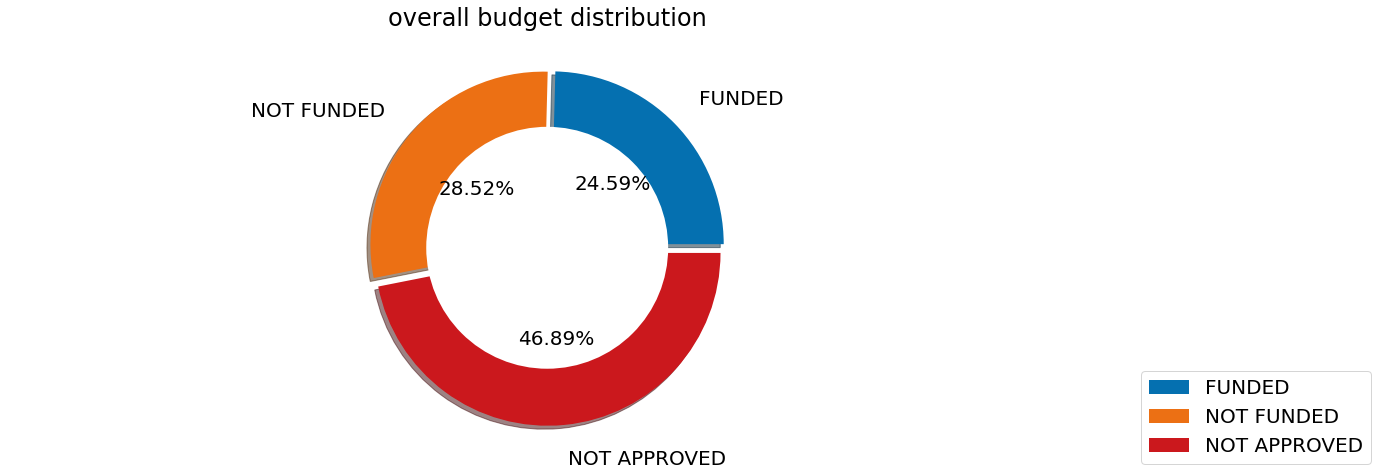

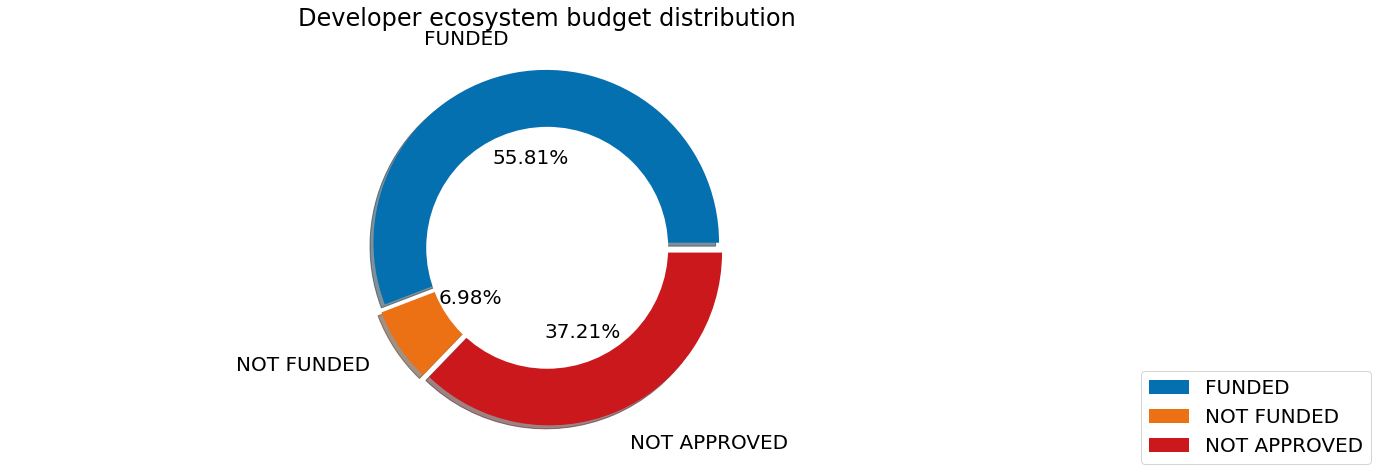

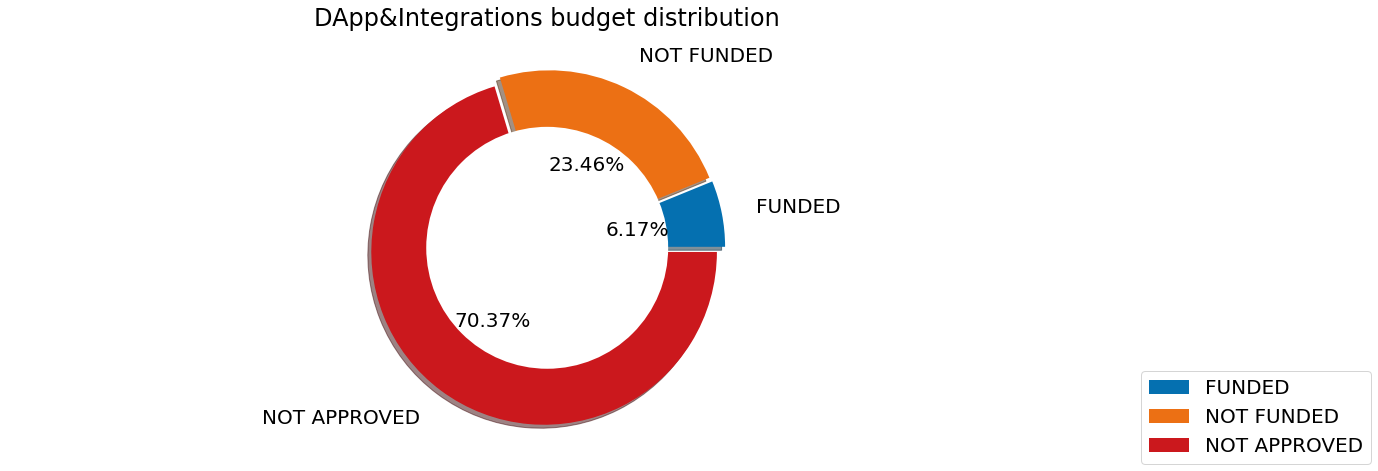

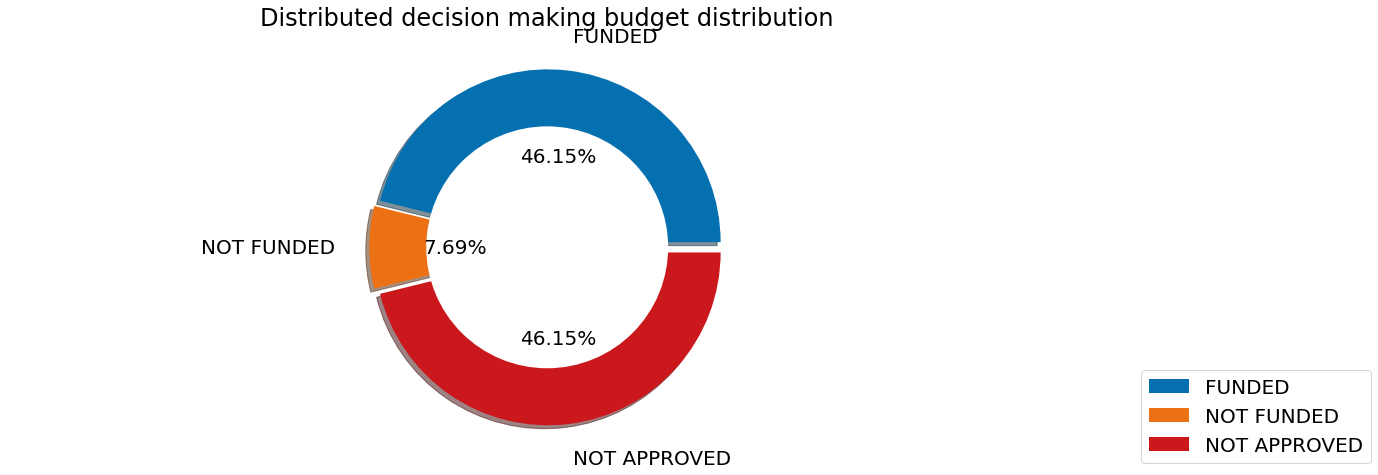

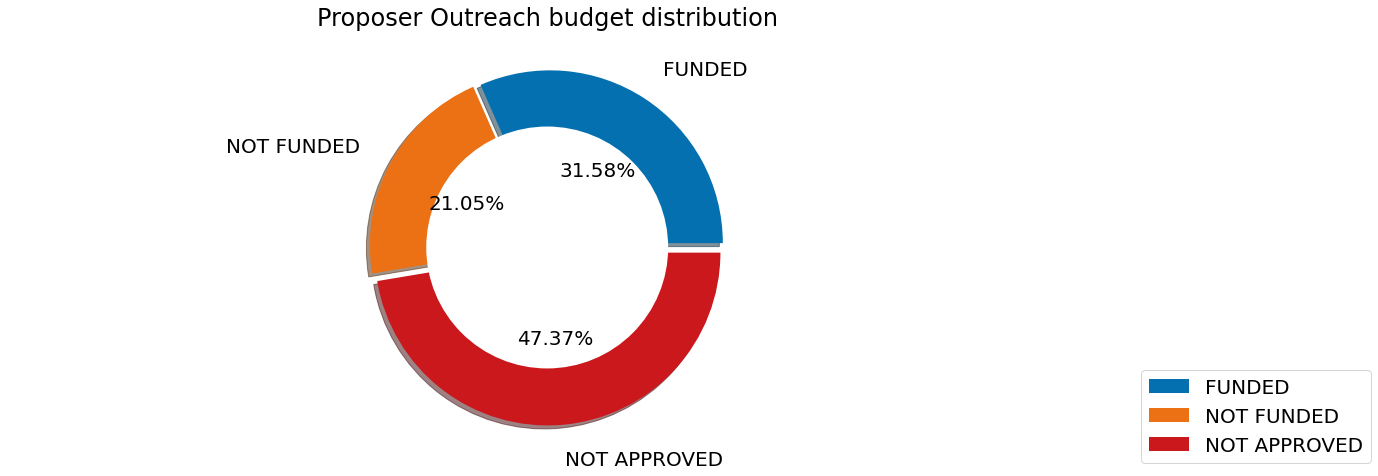

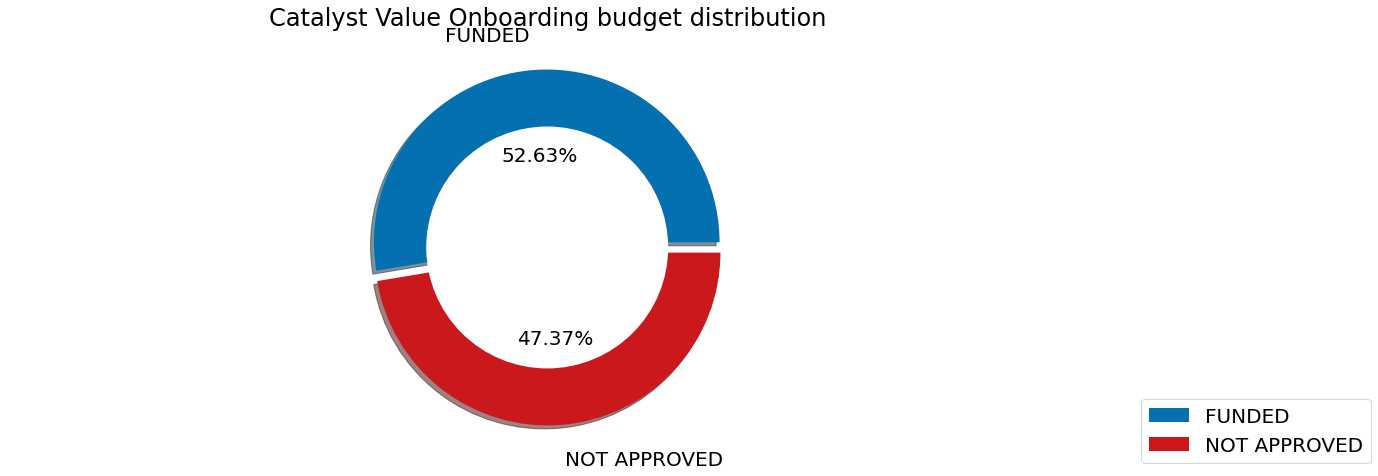

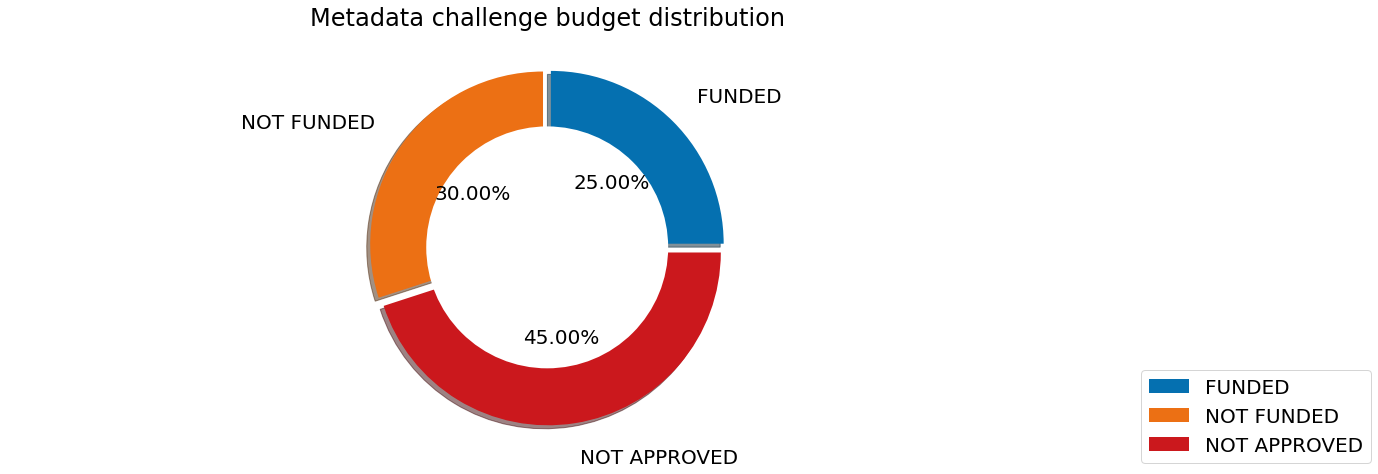

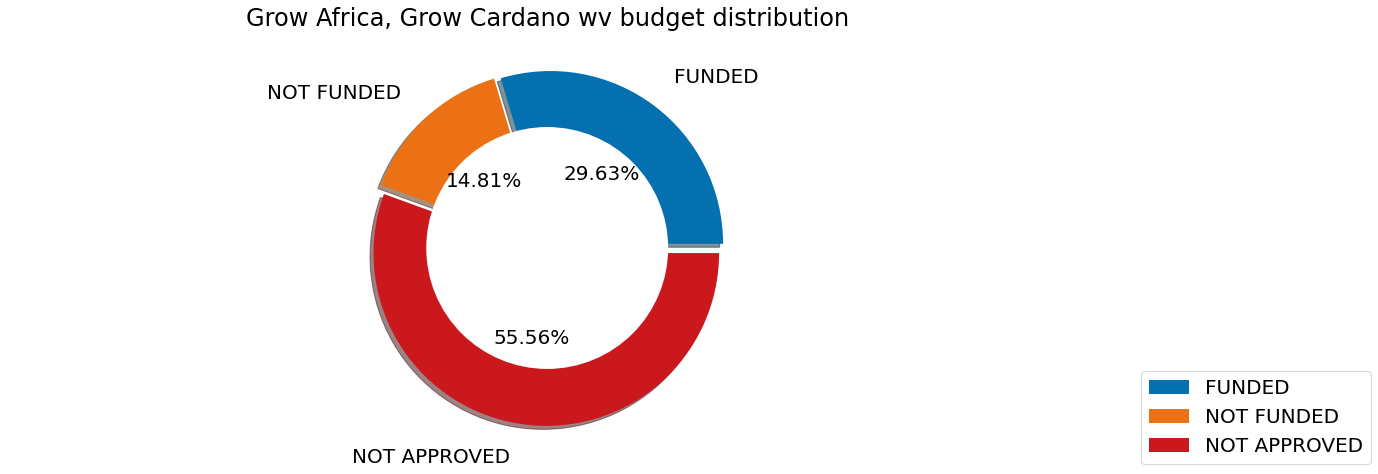

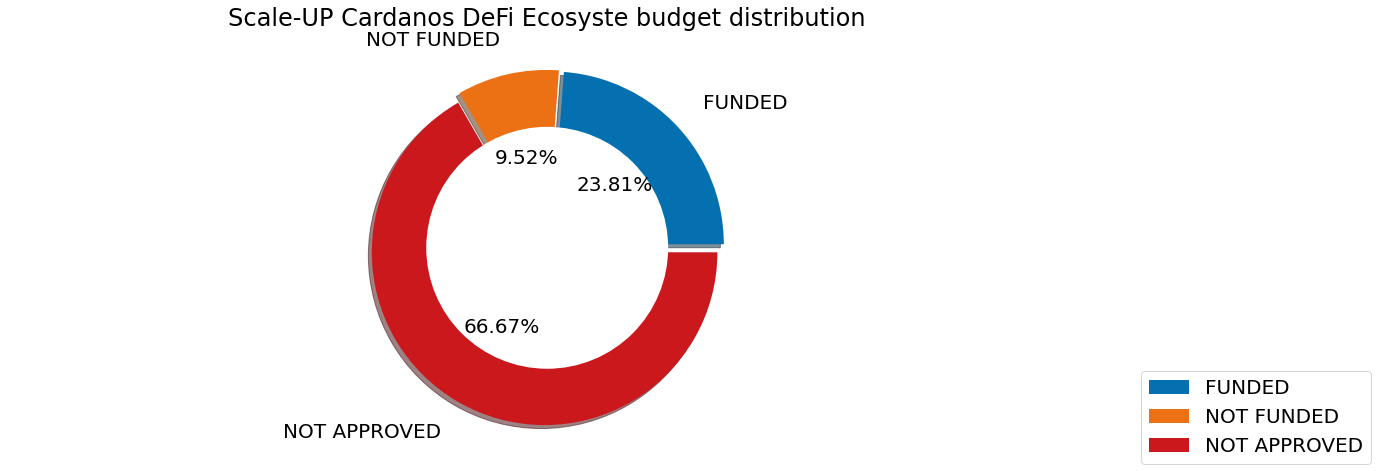

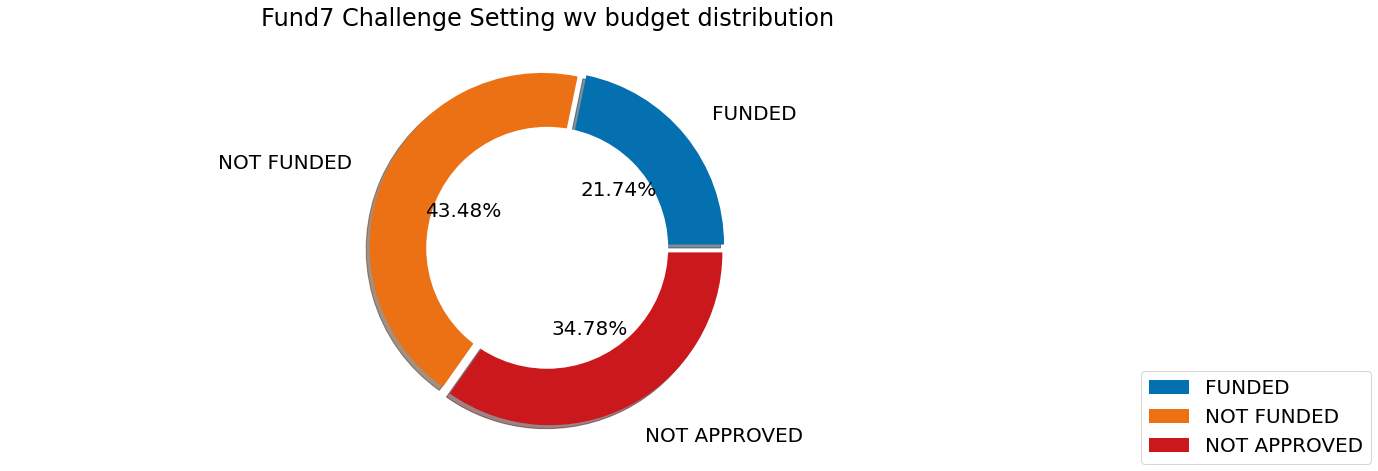

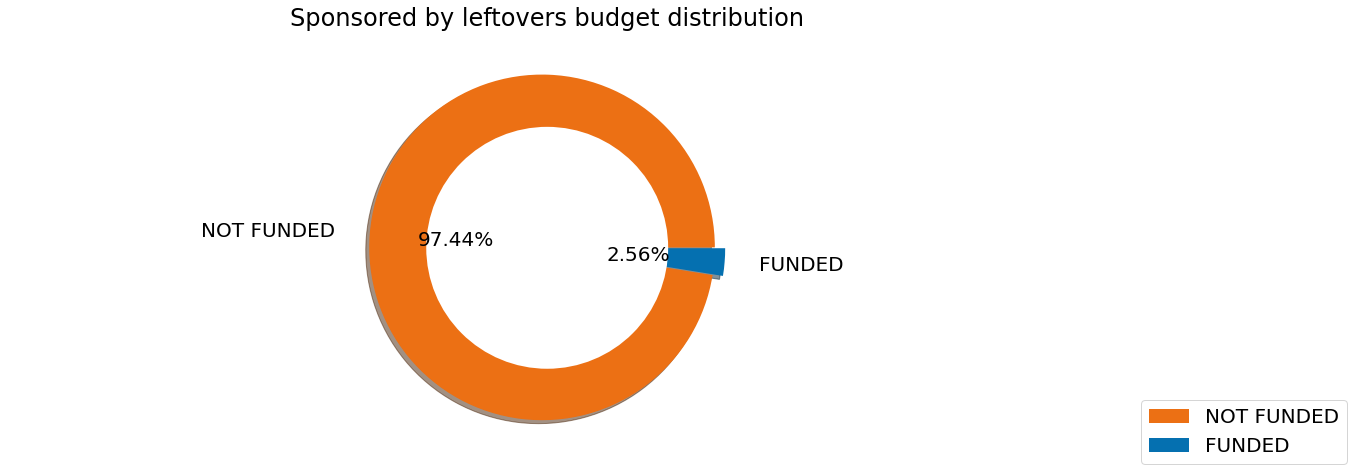

In [4]:
fund_obj.plot_budget_distribution()

# CATALYST REPORT

In [5]:
rprt = CatalystReport()

NameError: name 'CatalystReport' is not defined

In [ ]:
rprt.funds

## Evolution()

In [ ]:
'''
Evolution of Catalyst over time. Numbers of: 
    proposals, 
    challenges, 
    active CAs, 
    active vCAs, 
    voting power, 
    unique wallets
'''
f = 'f5'

In [ ]:
catalyst_f_eda[f].get_results()

In [ ]:
catalyst_f_eda[f].proposals

In [ ]:
catalyst_f_eda[f].challenges

#### df_evolution

In [ ]:
prop_evol = pd.Series(map(lambda c: c.proposals.shape[0], catalyst_f_eda.values()), 
                      index=catalyst_f_eda.keys(),
                      name='proposals_evolution',
                      dtype=int)
ch_evol = pd.Series(map(lambda c: c.challenges.shape[0], catalyst_f_eda.values()), 
                      index=catalyst_f_eda.keys(),
                      name='challenges_evolution',
                      dtype=int)
df_evol = pd.concat([prop_evol,
                    ch_evol], 
                    axis='columns', ignore_index=False)
df_evol

### Plot all evolution time series

In [ ]:
# # set figure
# rcParams["font.size"] = 20
# rows = 1
# cols = len(df_evol.columns)
# rcParams['figure.figsize'] = 9*cols, 6*rows
# fig, axes = plt.subplots(nrows=rows, ncols=cols, num='plot_evol', clear=True, sharex=True, sharey=False)

# for idx, metric in enumerate(df_evol.columns):
    
#     ax = axes[idx]
#     df_evol[metric].plot(kind='bar', ax=ax, color='#045a8d')
    
#     ax.set_title('{}'.format(metric.replace('_',' ').capitalize()))
#     if idx==0: ax.set_ylabel('Count')
#     else: ax.set_ylabel('')
#     ax.set_xlabel('Funds')
#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)
# #     plt.subplots_adjust(wspace=0.05)
rprt.plot_evolution()

### Single evolution plot

In [ ]:
feat = 'proposals_evolution'

# # set figure
# rcParams["font.size"] = 20
# rcParams['figure.figsize'] = 9, 6
# fig, ax = plt.subplots(nrows=1, ncols=1, num='plot_sing_evol', clear=True)

# df_evol[feat].plot(kind='bar', ax=ax, color='#045a8d')

# # set axes
# ax.set_ylabel('Count')
# ax.set_xlabel('Funds')

# ax.set_title('{}'.format(feat.replace('_',' ').capitalize()))
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

# # plt.subplots_adjust(wspace=0.05)

# # if save:
# #     pass
rprt.plot_single_evolution(feat)

In [ ]:
# set figure
rcParams["font.size"] = 40
rows = 1
cols = len(ALGS)
rcParams['figure.figsize'] = 9*cols, 6*rows
fig, axes = plt.subplots(nrows=rows, ncols=cols, num=db, clear=True, sharex=True, sharey=True)


for col_id, alg in enumerate(ALGS):

    color_it = itertools.cycle(self.COLORS)

    #load km-estimates file
    if alg in self.ESMAM_VARS:
        kmModels = pd.DataFrame(dic_matrix[alg][db][str(exp)])
    else:
        kmModels = pd.DataFrame(dic_matrix[alg][db])

    x = kmModels.times.values
    columns = list(kmModels.columns)
    columns.remove('times')

    ax = axes[col_id]
    for column in columns:
        if column == "population":
            ax.plot(x, kmModels[column], color='k', label='{}'.format(column), linestyle=':')
        else:
            ax.plot(x, kmModels[column], label='{}'.format(column), color=next(color_it))

    ax.set_title('{}'.format(alg))
    if col_id==0:
        ax.set_xlabel('Time')
        ax.set_ylabel('Survival probability')
    else:
        ax.set_xlabel('')
        ax.set_ylabel('')
    ax.set_ylim([0, 1])
    ax.set_yticks([0.5,1])
    ax.set_xlim([0, x[-1]+3])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend().set_visible(False)
    plt.xticks([])
    plt.subplots_adjust(wspace=0.05)